# **In this notebook, we will attempt to build various classification models to predict customer churn in a Telco company.**

**Dataset taken from: https://www.kaggle.com/blastchar/telco-customer-churn**

**1. Importing Libraries and Dataset**

**2. Exploratory Analysis**

**3. Data cleaning and preprocessing**

**4. Feature Engineering**

**5. Building Classification Models**

**6. Hypertuning Parameters**

**7. Conclusion**

**1. Importing Libraries and Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.offline as py
import plotly.tools as tls
py.init_notebook_mode(connected=True)
import cufflinks as cf
import itertools
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold, cross_val_score
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn import feature_selection, model_selection
import scikitplot as skplt
from sklearn.metrics import confusion_matrix,accuracy_score,average_precision_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, scorer, roc_curve
from sklearn import preprocessing
from sklearn.metrics import f1_score
from yellowbrick.classifier import DiscriminationThreshold
import time
import tensorflow as tf
import warnings
#plt.style.use(['dark_background'])
%matplotlib inline

import os
print(os.listdir("../input"))
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.

/opt/conda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.



['WA_Fn-UseC_-Telco-Customer-Churn.csv']


In [2]:
data = pd.read_csv("../input/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data = data.drop(["customerID"],axis=1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 20)

**2. Exploratory Analysis**

Let's visualise the different features.

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]
[ (2,1) x4,y4 ]  [ (2,2) x5,y5 ]  [ (2,3) x6,y6 ]
[ (3,1) x7,y7 ]  [ (3,2) x8,y8 ]  [ (3,3) x9,y9 ]



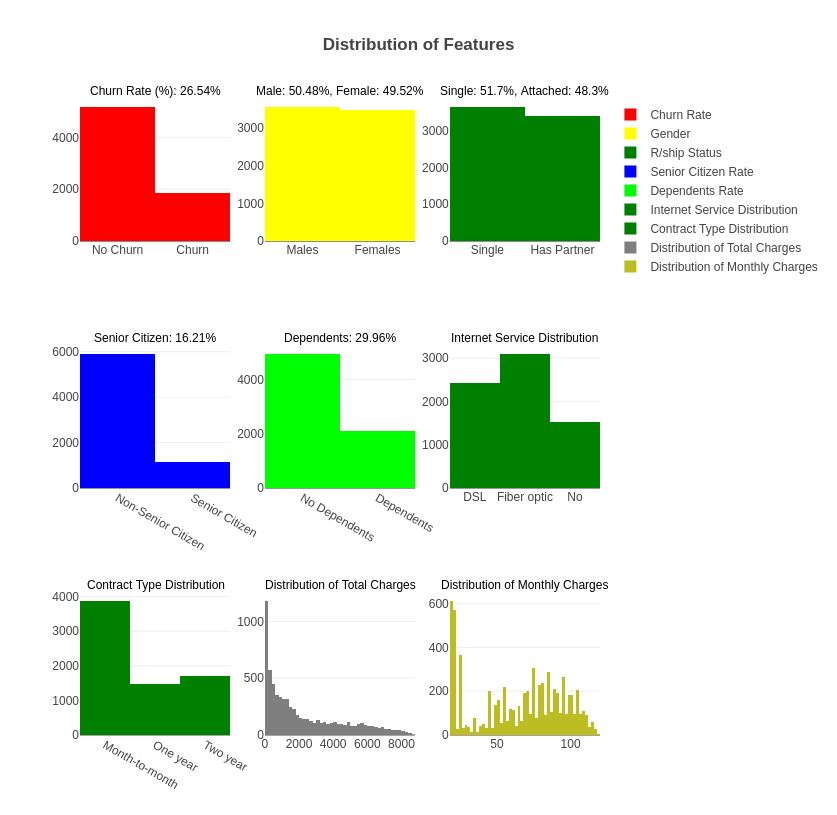

In [4]:
trace1 = go.Bar(
            x=['No Churn','Churn'],
            y=[sum(data["Churn"]=='No'),sum(data["Churn"]=='Yes')],
            marker=dict(color=["red","red"]),
            name="Churn Rate",
    )

trace2 = go.Bar(
            x=['Males','Females'],
            y=[sum(data["gender"]=='Male'),sum(data["gender"]=='Female')],
            marker=dict(color=["yellow","yellow"]),
            name='Gender'
    )


trace3 = go.Bar(
            x=['Single','Has Partner'],
            y=[sum(data["Partner"]=='No'),sum(data["Partner"]=='Yes')],
            marker=dict(color=["green","green"]),
            name='R/ship Status'
    
    )

trace4 = go.Bar(
            x=['Non-Senior Citizen','Senior Citizen'],
            y=[sum(data["SeniorCitizen"]==0),sum(data["SeniorCitizen"]==1)],
            marker=dict(color=["blue","blue"]),
            name='Senior Citizen Rate'
    )
trace5 = go.Bar(
            x=['No Dependents','Dependents'],
            y=[sum(data["Dependents"]=='No'),sum(data["Dependents"]=='Yes')],
            marker=dict(color=["lime","lime"]),
            name='Dependents Rate'
    )

trace6 = go.Bar(
            x=['DSL', 'Fiber optic', 'No'],
            y=[sum(data["InternetService"]=='DSL'),sum(data["InternetService"]=='Fiber optic'),sum(data["InternetService"]=='No')],
            marker=dict(color=["green","green","green"]),
            name='Internet Service Distribution'
    )

trace7 = go.Bar(
            x=['Month-to-month', 'One year', 'Two year'],
            y=[sum(data["Contract"]=='Month-to-month'),sum(data["Contract"]=='One year'),sum(data["Contract"]=='Two year')],
            marker=dict(color=["green","green","green"]),
            name='Contract Type Distribution'
    )

trace8 = go.Histogram(x=data['TotalCharges'],name="Distribution of Total Charges")

trace9 = go.Histogram(x=data['MonthlyCharges'],name="Distribution of Monthly Charges")

fig = tools.make_subplots(rows=3, cols=3,
                          subplot_titles=["Churn Rate (%): " + str(round(100*(sum(data["Churn"]=='Yes')/data.shape[0]),2)) +"%",
                                          "Male: " + str(round(100*(sum(data["gender"]=="Male")/data.shape[0]),2)) + "%, Female: " + str(round(100-100*(sum(data["gender"]=="Male")/data.shape[0]),2))+"%",
                                          "Single: " + str(round(100*(sum(data["Partner"]=="No")/data.shape[0]),2)) + "%, Attached: " + str(round(100-100*(sum(data["Partner"]=="No")/data.shape[0]),2))+"%",
                                          "Senior Citizen: " + str(round(100-100*(sum(data["SeniorCitizen"]==0)/data.shape[0]),2))+"%",
                                          "Dependents: " + str(round(100*(sum(data["Dependents"]=="Yes")/data.shape[0]),2)) + "%",
                                          "Internet Service Distribution",
                                          "Contract Type Distribution",
                                          "Distribution of Total Charges",
                                          "Distribution of Monthly Charges"
                                          ])
for i in fig['layout']['annotations']:
    i['font'] = dict(size=12,color='black')
fig.append_trace(trace1, 1,1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 3)
fig.append_trace(trace4, 2, 1)
fig.append_trace(trace5, 2, 2)
fig.append_trace(trace6, 2, 3)
fig.append_trace(trace7, 3, 1)
fig.append_trace(trace8, 3, 2)
fig.append_trace(trace9, 3, 3)
fig['layout'].update(height=800, width=1000, title="<b>Distribution of Features<b>")
py.iplot(fig)

Let's view the rates of churn among different variables.

In [5]:
def churn_distribution(variable):
    num = len(list(train[variable].unique()))
    x=[]
    for i in range(num):
        x.append(go.Bar(
            x=['Churn','No Churn'],
            y=[data[data['Churn']=='Yes'][variable].value_counts()[i],data[data['Churn']=='No'][variable].value_counts()[i]],
            name=str(data[data['Churn']==1][variable].value_counts().index[i])))
    layout = go.Layout(
        width=500,
        height=400,
        barmode='stack',
        title = "Churn rate among " + str(variable)
    )

    fig = go.Figure(data=x, layout=layout)
    py.iplot(fig, filename='stacked-bar')
    
    
def churn_stacked_bar(variable):
    x1=list(data[variable].unique())
    trace1 = go.Bar(
        x=x1,
        y=[data[data[variable]==x1[i]]["Churn"].value_counts()[0] for i in range(len(x1))],
        name='No Churn'
    )
    trace2 = go.Bar(
        x=x1,
        y=[data[data[variable]==x1[i]]["Churn"].value_counts()[1] for i in range(len(x1))],
        name='Churn'
    )
    layout = go.Layout(
        width=500,
        height=400,
        barmode='stack',
        title = "Churn rate among " + str(variable)
    )
    t=[trace1,trace2]

    fig = go.Figure(data=t, layout=layout)
    py.iplot(fig)

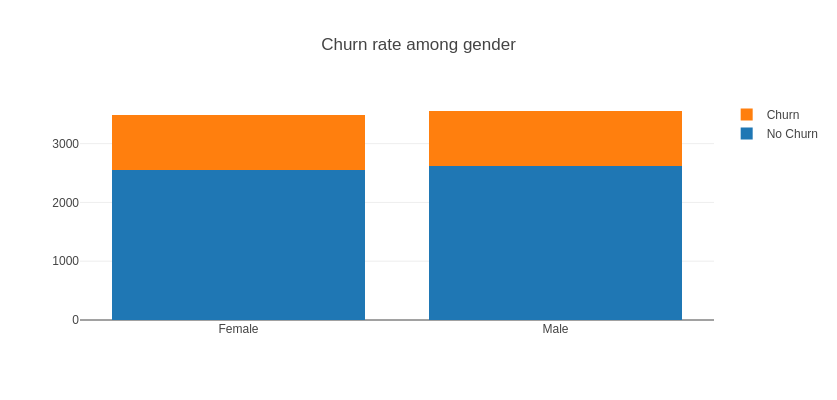

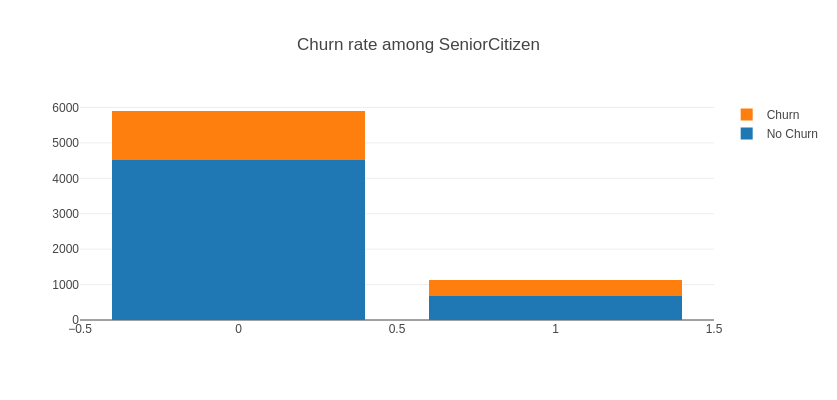

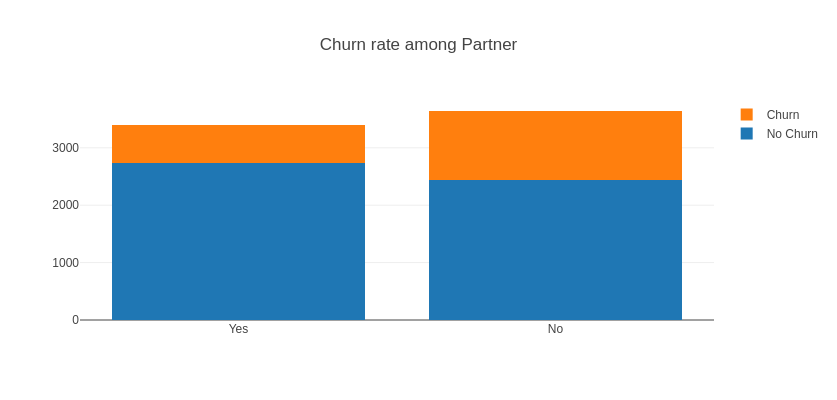

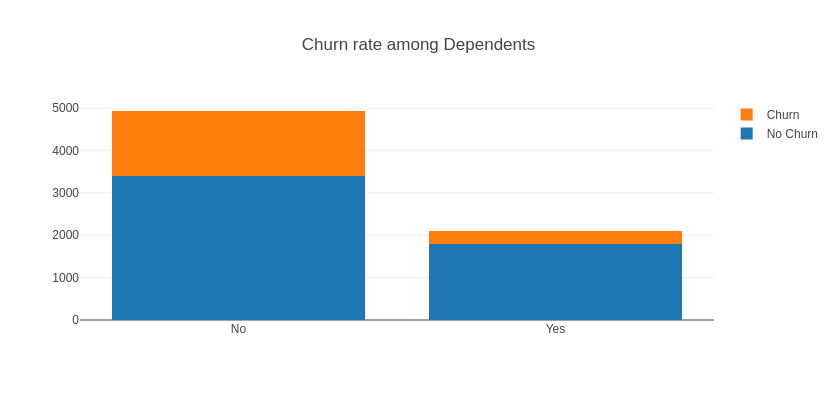

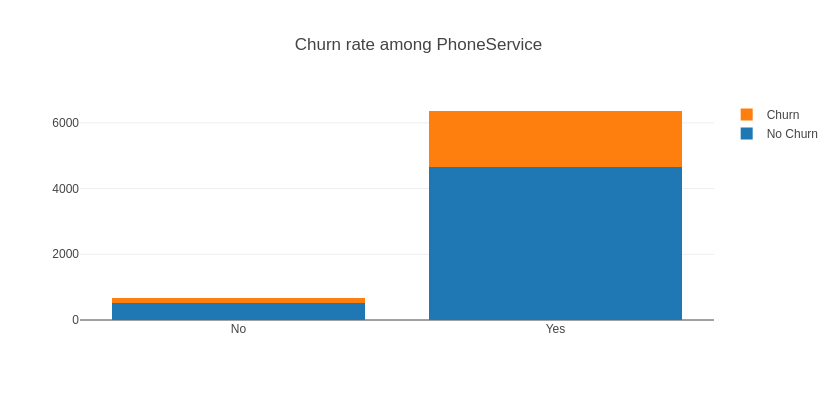

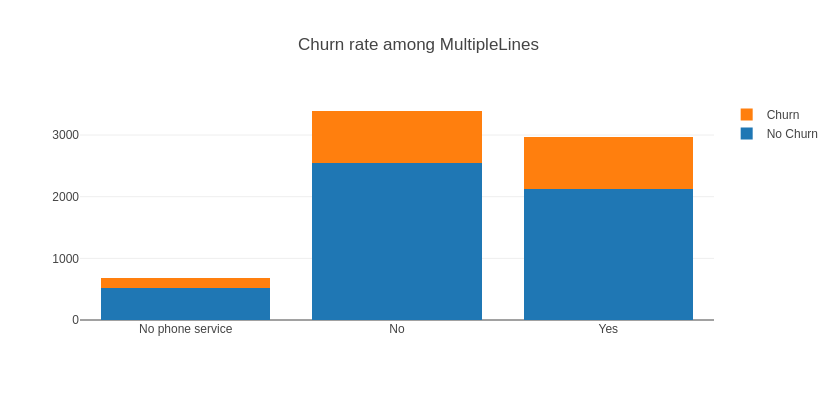

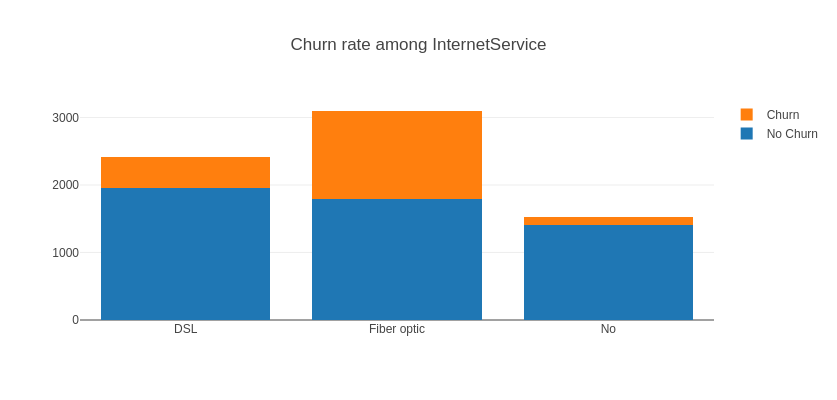

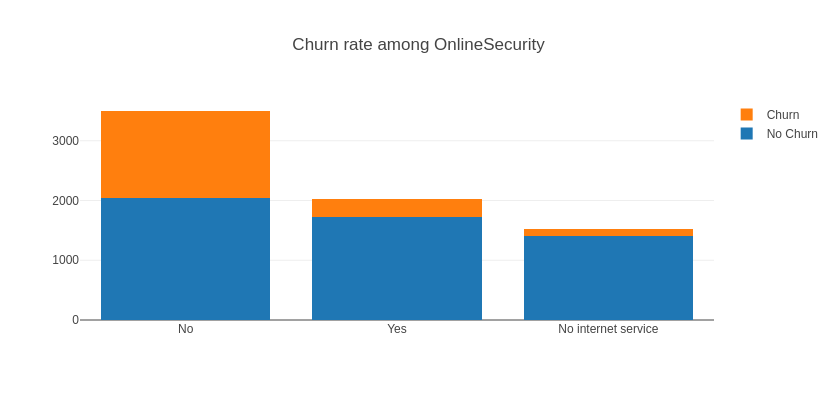

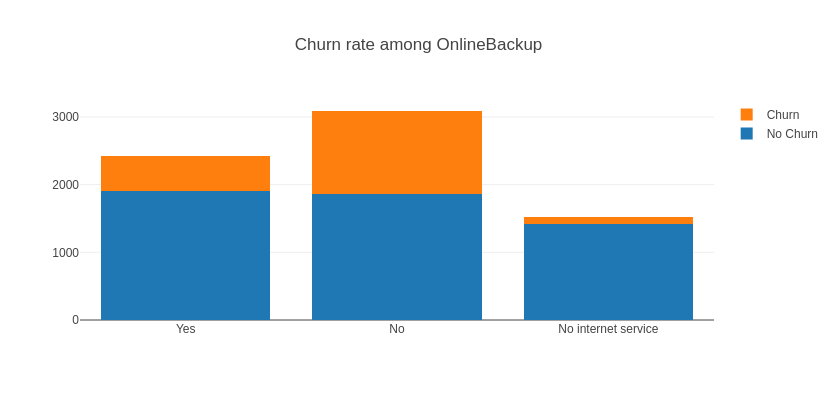

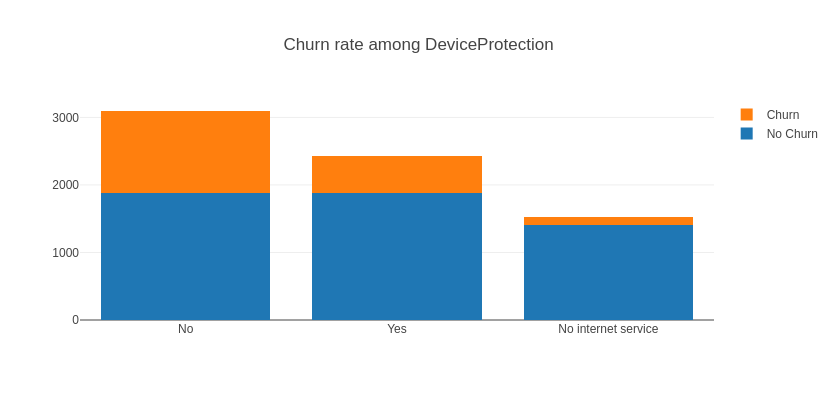

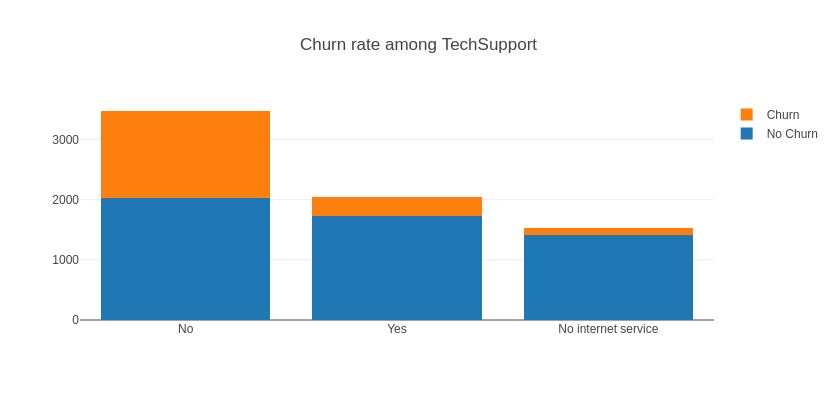

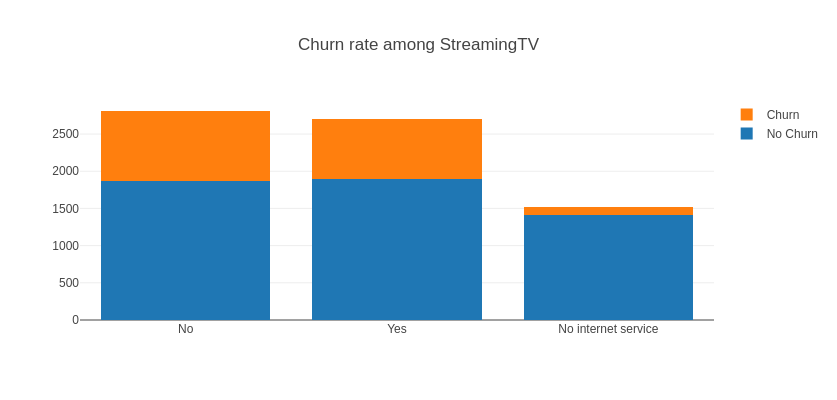

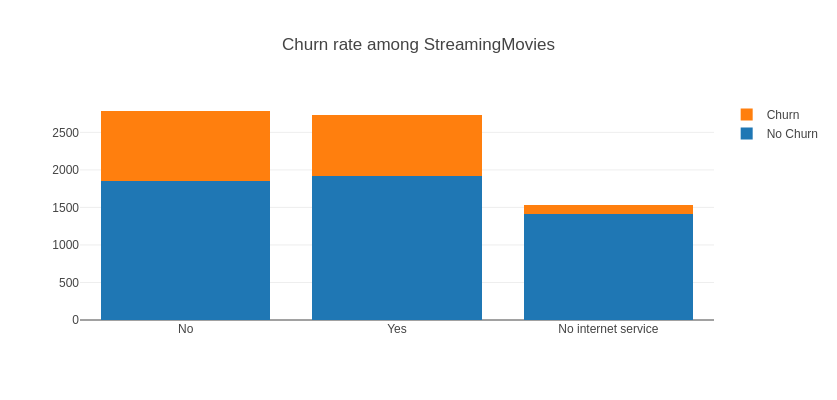

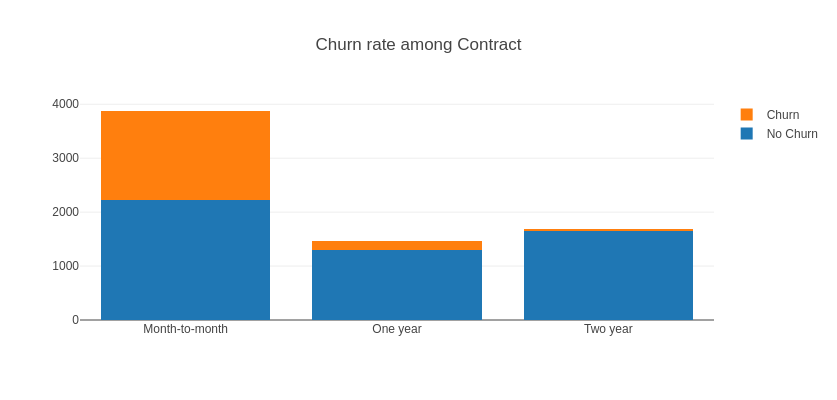

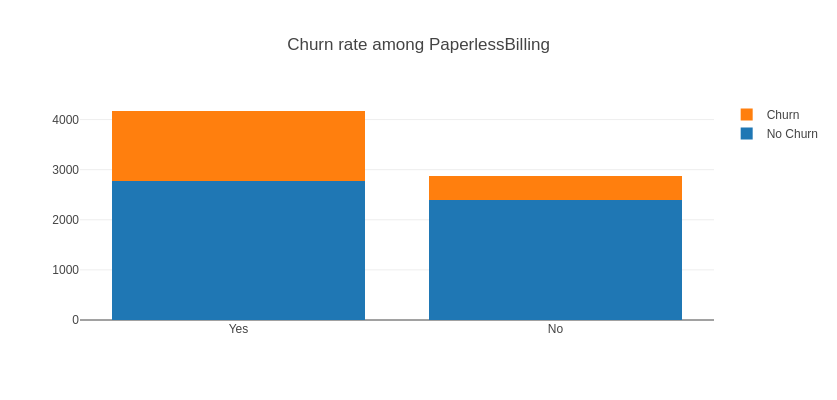

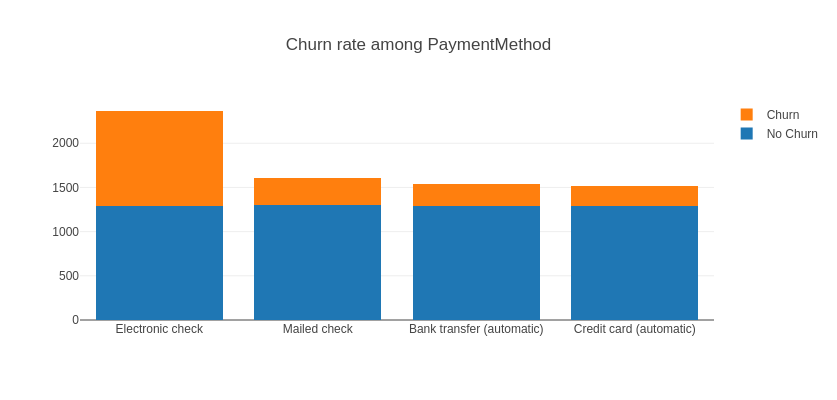

In [6]:
bin_cols   = ['gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod']
for i in bin_cols:
    churn_stacked_bar(i)

We can see that:

- **Senior Citizens tend to have a higher rate of churn (about 45%) as compared to non-senior citizens (about 25%).**

- **Customers that have do not have dependents tend to have a higher churn rate (about 30%)  as compared to those that have dependents (about 15%).**

- **Customers that uses fiber optic has a much higher churn rate (about 40%) as compared to the rest of the internet services.**

- **Customers that do not have online security, online backup, device protection, tech support all have a higher churn rate respectively**

- **Customers that have short contracts (Month-to-Month) have a higher churn rate (about 40%) as compared to those with longer contracts**

- **Customers that pay by electronic check have a higher churn rate (about 45%) compared to the rest of the methods**

- **Customers that have paperless billing have higher churn rate (33%) as compared to those that do not (15%).**

Let's view the correlation among different variables.

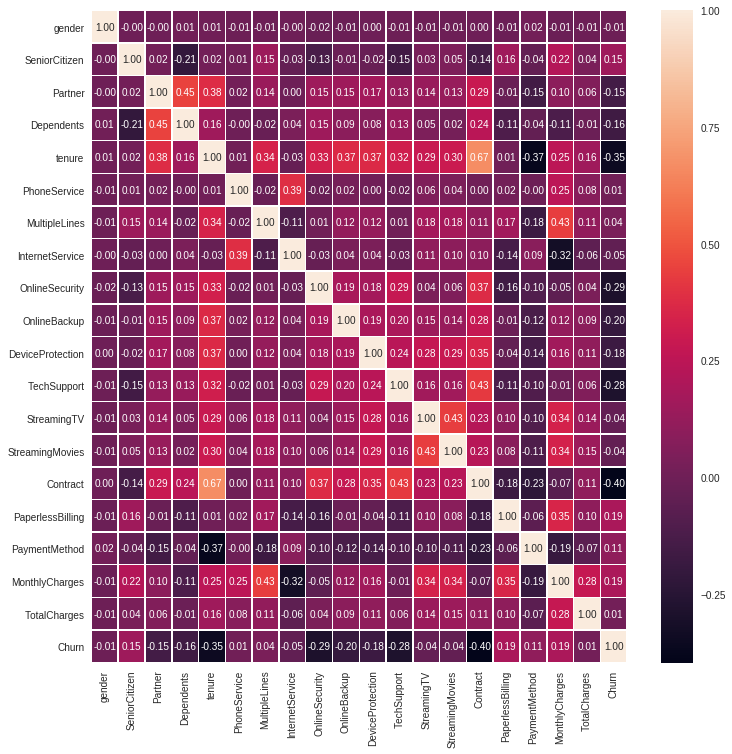

In [7]:
cols = data.columns
numer_cols = data._get_numeric_data().columns
cat_cols = list(set(cols) - set(numer_cols))
for i in cat_cols:
    data[i] = data[i].astype('category')
    data[i] = data[i].cat.codes
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, fmt= '.2f',ax=ax)

In [8]:
for i in data.columns:
    print (i + ": "+str(sum(data[i].isnull()))+" missing values")

gender: 0 missing values
SeniorCitizen: 0 missing values
Partner: 0 missing values
Dependents: 0 missing values
tenure: 0 missing values
PhoneService: 0 missing values
MultipleLines: 0 missing values
InternetService: 0 missing values
OnlineSecurity: 0 missing values
OnlineBackup: 0 missing values
DeviceProtection: 0 missing values
TechSupport: 0 missing values
StreamingTV: 0 missing values
StreamingMovies: 0 missing values
Contract: 0 missing values
PaperlessBilling: 0 missing values
PaymentMethod: 0 missing values
MonthlyCharges: 0 missing values
TotalCharges: 0 missing values
Churn: 0 missing values


**3. Data Cleaning and Preprocessing**

In [9]:
#Target columns
Target = ["Churn"]
#categorical columns
cat_cols   = data.nunique()[data.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in Target]
#numerical columns
num_cols   = [x for x in data.columns if x not in cat_cols + Target]
#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])
    
#Duplicating columns for multi value columns
data = pd.get_dummies(data = data,columns = multi_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
data2 = data.copy()
data = data.drop(columns = num_cols,axis = 1)
data = data.merge(scaled,left_index=True,right_index=True,how = "left")
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_0,MultipleLines_1,MultipleLines_2,InternetService_0,InternetService_1,InternetService_2,OnlineSecurity_0,OnlineSecurity_1,OnlineSecurity_2,OnlineBackup_0,OnlineBackup_1,OnlineBackup_2,DeviceProtection_0,DeviceProtection_1,DeviceProtection_2,TechSupport_0,TechSupport_1,TechSupport_2,StreamingTV_0,StreamingTV_1,StreamingTV_2,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,-1.277445,-1.160323,-0.398608
1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0.066327,-0.259629,-0.948762
2,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,-1.236724,-0.362660,-1.641883
3,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0.514251,-0.746535,-0.983710
4,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,-1.236724,0.197365,-1.235224


**4. Feature Engineering**

We shall add 3 features based on our exploratory analysis:

- **Whether a customer is both a senior citizens and have dependents**
- **If a customer do not have any online security, backup, device protection and tech support**
- **Whether a customer has both short contract and electronic check payment and paperless billing**

In [10]:
data["Senior+Depend"] = np.where(((data["SeniorCitizen"]==1) & (data["Dependents"]==1)),1,0)
data["no_extra_services"] = np.where(((data["OnlineSecurity_0"]==1) & (data["OnlineBackup_0"]==1) & (data["DeviceProtection_0"]==1) & (data["TechSupport_0"]==1)),1,0)
data["ShortContract+electronic+paperless"] = np.where(((data["Contract_0"]==1) & (data["PaymentMethod_2"]==1) & (data["PaperlessBilling"]==1)),1,0)  #Month-to-month contract and electronic payment and paperless billing
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_0,MultipleLines_1,MultipleLines_2,InternetService_0,InternetService_1,InternetService_2,OnlineSecurity_0,OnlineSecurity_1,OnlineSecurity_2,OnlineBackup_0,OnlineBackup_1,OnlineBackup_2,DeviceProtection_0,DeviceProtection_1,DeviceProtection_2,TechSupport_0,TechSupport_1,TechSupport_2,StreamingTV_0,StreamingTV_1,StreamingTV_2,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3,tenure,MonthlyCharges,TotalCharges,Senior+Depend,no_extra_services,ShortContract+electronic+paperless
0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,-1.277445,-1.160323,-0.398608,0,0,1
1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0.066327,-0.259629,-0.948762,0,0,0
2,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,-1.236724,-0.362660,-1.641883,0,0,0
3,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0.514251,-0.746535,-0.983710,0,0,0
4,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,-1.236724,0.197365,-1.235224,0,1,1


**5. Building Classification Models**

In [11]:
y = data.loc[:,"Churn"]
#splitting train and test data 
train,test = train_test_split(data,test_size = .2 ,random_state = 0,stratify=y)
##seperating dependent and independent variables
cols    = [i for i in data.columns if i not in Target]
x_train = train[cols]
y_train = train[Target]
x_test  = test[cols]
y_test = test[Target]
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    ensemble.AdaBoostClassifier(learning_rate = 0.1, n_estimators= 100, random_state= 0),
    ensemble.BaggingClassifier(max_samples= 0.5, n_estimators= 300, random_state= 0),
    ensemble.ExtraTreesClassifier(criterion= 'gini', max_depth= 10, n_estimators= 10, random_state= 0),
    ensemble.GradientBoostingClassifier(learning_rate= 0.05, max_depth= 4, n_estimators= 300, random_state= 0),
    ensemble.RandomForestClassifier(criterion= 'gini', max_depth= 10, n_estimators= 300, oob_score= True, random_state= 0),
    
    linear_model.LogisticRegressionCV(fit_intercept= False, random_state= 0, solver= 'lbfgs'),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),

    naive_bayes.BernoulliNB(alpha= 0.75),
    naive_bayes.GaussianNB(),
    

    neighbors.KNeighborsClassifier(algorithm= 'brute', weights= 'uniform'),
    

    svm.SVC(C= 5, decision_function_shape= 'ovo', gamma= 0.1, probability= True, random_state= 0),

    tree.DecisionTreeClassifier(),

    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    XGBClassifier(learning_rate= 0.001, seed= 0)    
    ]

data_x_bin = list(data.columns)
data_x_bin.remove('Churn')

cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .2, train_size = .8, random_state = 0 ) 

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean','MLA Test Accuracy Mean','MLA Train Precision Mean','MLA Test Precision Mean','MLA Train Recall Mean', 'MLA Test Recall Mean', 'MLA Train F1 Mean','MLA Test F1 Mean',"MLA Train AUROC Mean","MLA Test AUROC Mean",'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.at[row_index, 'MLA Name'] = MLA_name
    MLA_compare.at[row_index, 'MLA Parameters'] = str(alg.get_params())
    alg.fit(x_train, y_train)
    cv_results_recall = model_selection.cross_validate(alg, x_train, y_train, cv  = cv_split,scoring = 'recall')
    cv_results_acc = model_selection.cross_validate(alg, x_train, y_train, cv  = cv_split,scoring = 'accuracy')
    cv_results_f1 = model_selection.cross_validate(alg, x_train, y_train, cv  = cv_split,scoring = 'f1')
    cv_results_auroc = model_selection.cross_validate(alg, x_train, y_train, cv  = cv_split,scoring = 'roc_auc')
    cv_results_prec = model_selection.cross_validate(alg,x_train, y_train, cv  = cv_split,scoring = 'precision')
    MLA_compare.at[row_index, 'MLA Time'] = round(cv_results_acc['fit_time'].mean(),2)
    MLA_compare.at[row_index, 'MLA Train Accuracy Mean'] = round(cv_results_acc['train_score'].mean(),3)
    MLA_compare.at[row_index, 'MLA Test Accuracy Mean'] = round(accuracy_score(y_test, alg.predict(x_test)),3) 
    MLA_compare.at[row_index, 'MLA Train Precision Mean'] = round(cv_results_prec['train_score'].mean(),3)
    MLA_compare.at[row_index, 'MLA Test Precision Mean'] = round(precision_score(y_test, alg.predict(x_test)),3) 
    MLA_compare.at[row_index, 'MLA Train Recall Mean'] = round(cv_results_recall['train_score'].mean(),3)
    MLA_compare.at[row_index, 'MLA Test Recall Mean'] = round(recall_score(y_test, alg.predict(x_test)),3) 
    MLA_compare.at[row_index, 'MLA Train F1 Mean'] = round(cv_results_f1['train_score'].mean(),3)
    MLA_compare.at[row_index, 'MLA Test F1 Mean'] = round(f1_score(y_test, alg.predict(x_test)),3) 
    MLA_compare.at[row_index, 'MLA Train AUROC Mean'] = round(cv_results_auroc['train_score'].mean(),3)   
    MLA_compare.at[row_index, 'MLA Test AUROC Mean'] = round(roc_auc_score(y_test, alg.predict(x_test)),3) 
    
    
    MLA_predict[MLA_name] = alg.predict(data[data_x_bin])
    print(MLA_name + " done")
    row_index+=1

MLA_compare.sort_values(by = ['MLA Test Recall Mean'], ascending = False, inplace = True)
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
MLA_compare_copy = MLA_compare.copy()
MLA_compare_copy= MLA_compare_copy.style.apply(highlight_max,subset=['MLA Test Accuracy Mean', 'MLA Test Precision Mean','MLA Test Recall Mean', 'MLA Test F1 Mean','MLA Test AUROC Mean'])
MLA_compare_copy


AdaBoostClassifier done
BaggingClassifier done
ExtraTreesClassifier done
GradientBoostingClassifier done
RandomForestClassifier done
LogisticRegressionCV done
RidgeClassifierCV done
SGDClassifier done
Perceptron done
BernoulliNB done
GaussianNB done
KNeighborsClassifier done
SVC done
DecisionTreeClassifier done
QuadraticDiscriminantAnalysis done
XGBClassifier done


,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Train Precision Mean,MLA Test Precision Mean,MLA Train Recall Mean,MLA Test Recall Mean,MLA Train F1 Mean,MLA Test F1 Mean,MLA Train AUROC Mean,MLA Test AUROC Mean,MLA Time
7,SGDClassifier,"{'alpha': 0.0001, 'average': False, 'class_weight': None, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': None, 'n_iter': None, 'n_jobs': 1, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': None, 'verbose': 0, 'warm_start': False}",0.74,0.6,0.576,0.39,0.483,0.898,0.573,0.544,0.784,0.696,0.01
10,GaussianNB,{'priors': None},0.705,0.716,0.467,0.48,0.835,0.818,0.599,0.605,0.817,0.749,0.01
9,BernoulliNB,"{'alpha': 0.75, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}",0.733,0.739,0.496,0.505,0.785,0.786,0.608,0.615,0.817,0.754,0.01
5,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, 'dual': False, 'fit_intercept': False, 'intercept_scaling': 1.0, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': 1, 'penalty': 'l2', 'random_state': 0, 'refit': True, 'scoring': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0}",0.807,0.802,0.667,0.655,0.538,0.537,0.596,0.59,0.846,0.718,0.67
11,KNeighborsClassifier,"{'algorithm': 'brute', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': 1, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}",0.842,0.767,0.731,0.566,0.63,0.519,0.677,0.541,0.901,0.687,0
12,SVC,"{'C': 5, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 0, 'shrinking': True, 'tol': 0.001, 'verbose': False}",0.868,0.792,0.791,0.634,0.68,0.513,0.731,0.567,0.936,0.703,6.74
13,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}",0.998,0.743,0.999,0.516,0.993,0.513,0.996,0.515,1,0.67,0.03
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 0}",0.807,0.808,0.681,0.686,0.502,0.508,0.578,0.584,0.851,0.712,0.51
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'presort': 'auto', 'random_state': 0, 'subsample': 1.0, 'verbose': 0, 'warm_start': False}",0.875,0.794,0.82,0.643,0.672,0.505,0.738,0.566,0.936,0.702,3.2
6,RidgeClassifierCV,"{'alphas': (0.1, 1.0, 10.0), 'class_weight': None, 'cv': None, 'fit_intercept': True, 'normalize': False, 'scoring': None}",0.806,0.8,0.681,0.663,0.496,0.5,0.574,0.57,0.841,0.704,0.05


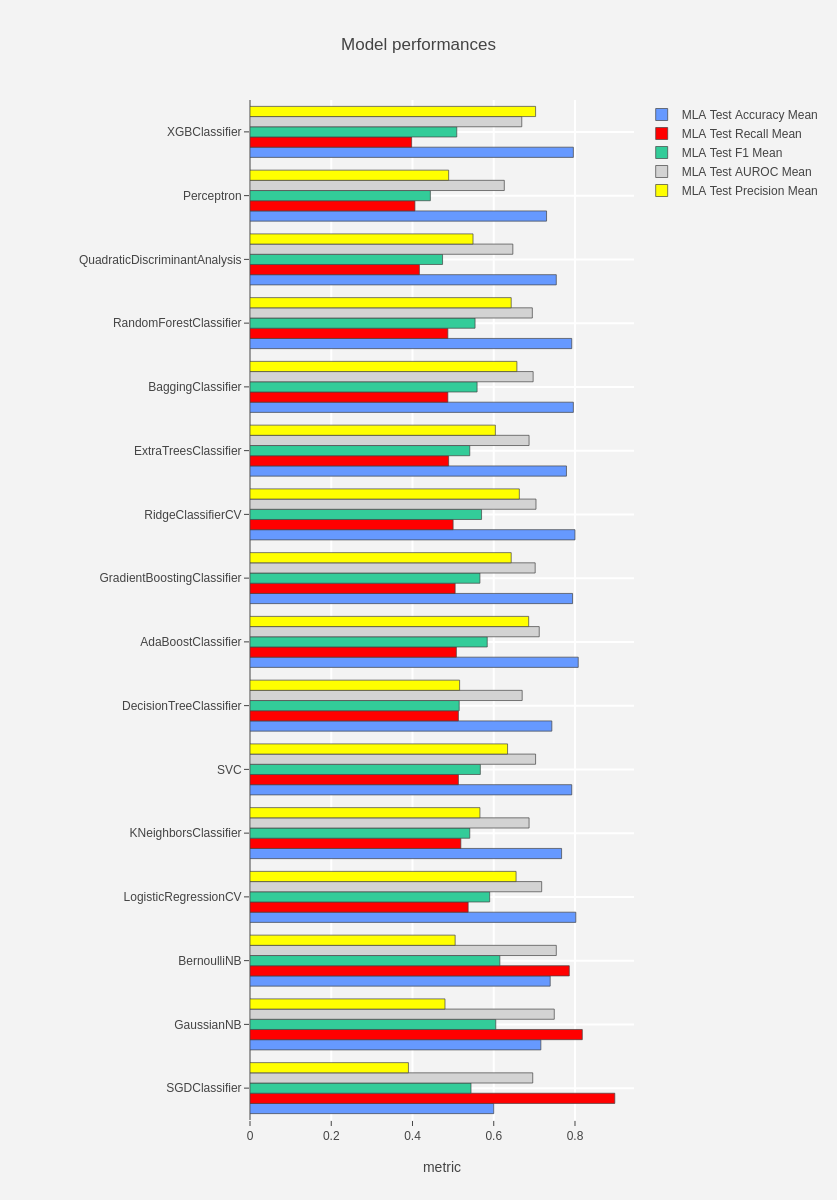

In [12]:
def model_comparison(table,metric,color) :
    tracer = go.Bar(y = table["MLA Name"] ,
                    x = table[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model performances",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "metric",
                                     zerolinewidth=1,
                                     ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        margin = dict(l = 250),
                        height = 1200
                       )
                  )


trace1  = model_comparison(MLA_compare,"MLA Test Accuracy Mean","#6699FF")
trace2  = model_comparison(MLA_compare,'MLA Test Recall Mean',"red")
trace3  = model_comparison(MLA_compare,'MLA Test F1 Mean',"#33CC99")
trace4  = model_comparison(MLA_compare,'MLA Test AUROC Mean',"lightgrey")
trace5  = model_comparison(MLA_compare,'MLA Test Precision Mean',"yellow")
traces = [trace1,trace2,trace3,trace4,trace5]
fig = go.Figure(data=traces,layout=layout)
py.iplot(fig)

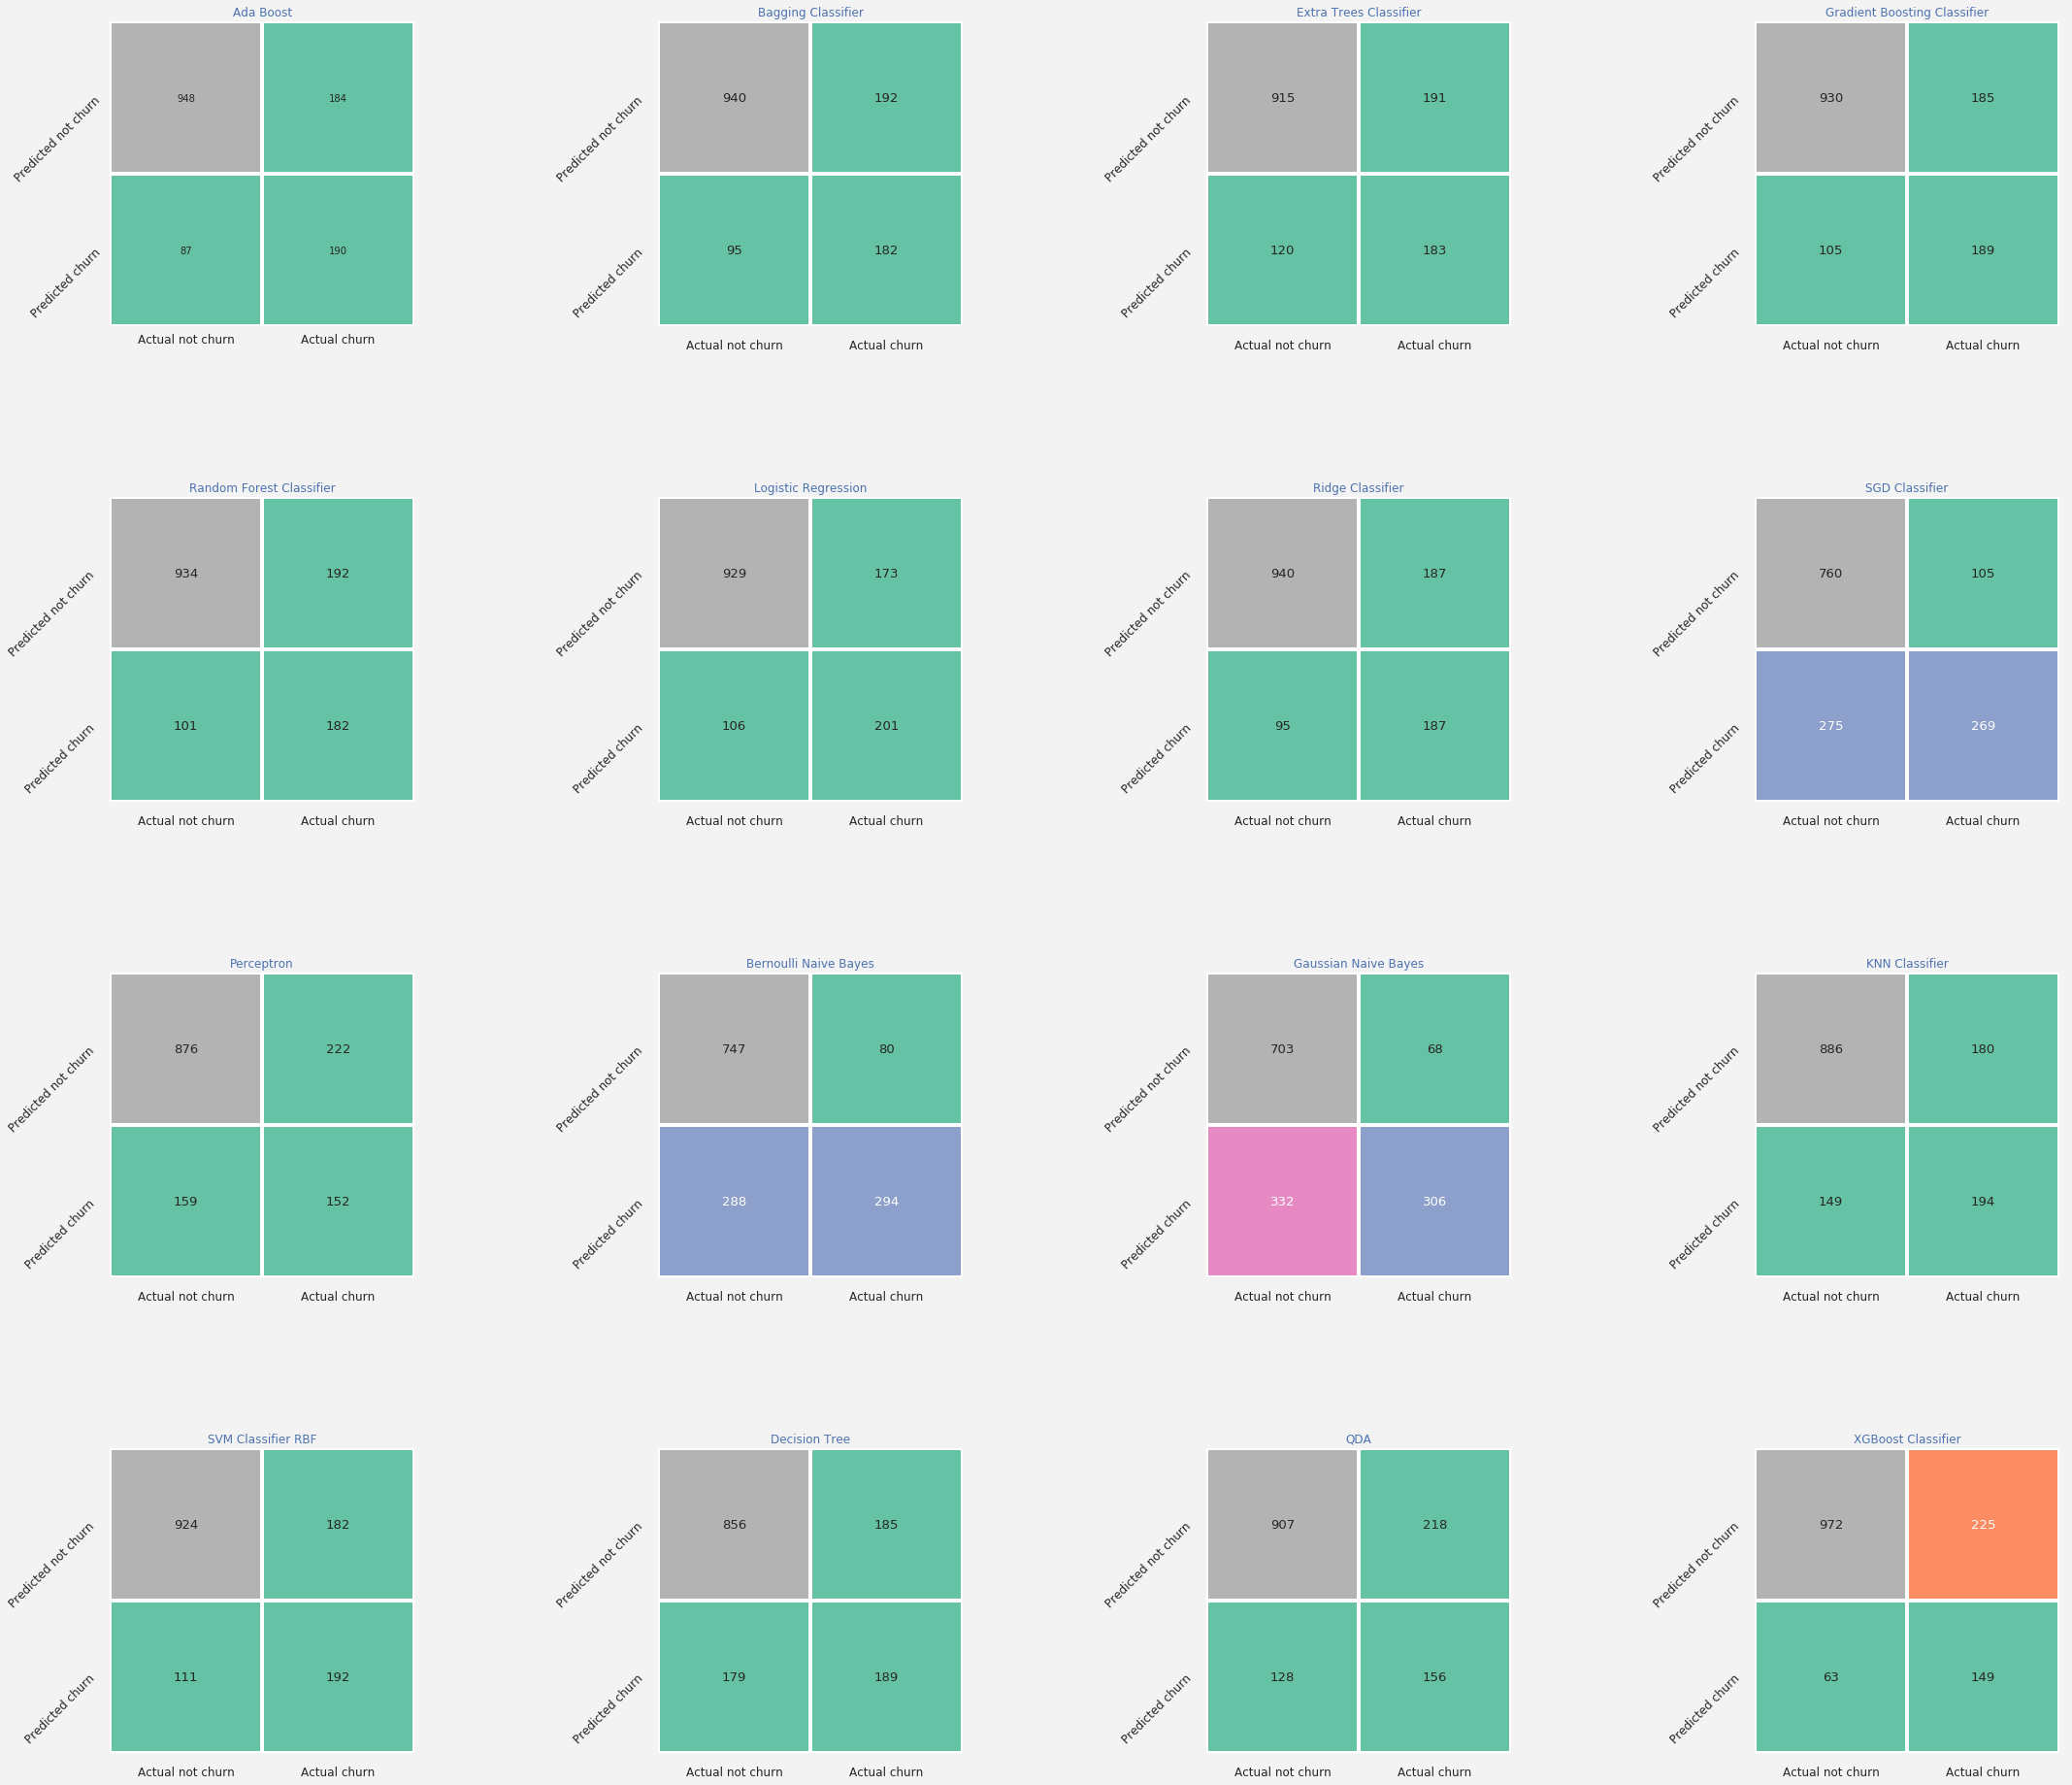

In [13]:
adaboost = ensemble.AdaBoostClassifier(learning_rate = 0.1, n_estimators= 100, random_state= 0).fit(x_train,y_train)
bagging = ensemble.BaggingClassifier(max_samples= 0.5, n_estimators= 300, random_state= 0).fit(x_train,y_train)
exttree = ensemble.ExtraTreesClassifier(criterion= 'gini', max_depth= 10, n_estimators= 10, random_state= 0).fit(x_train,y_train)
gbc = ensemble.GradientBoostingClassifier(learning_rate= 0.05, max_depth= 4, n_estimators= 300, random_state= 0).fit(x_train,y_train)
rfc = ensemble.RandomForestClassifier(criterion= 'gini', max_depth= 10, n_estimators= 300, oob_score= True, random_state= 0).fit(x_train,y_train)
logit = linear_model.LogisticRegressionCV(fit_intercept= False, random_state= 0, solver= 'lbfgs').fit(x_train,y_train)
ridge = linear_model.RidgeClassifierCV().fit(x_train,y_train)
sgdc = linear_model.SGDClassifier().fit(x_train,y_train)
perc = linear_model.Perceptron().fit(x_train,y_train)
bnb = naive_bayes.BernoulliNB(alpha= 0.75).fit(x_train,y_train)
gnb = naive_bayes.GaussianNB().fit(x_train,y_train).fit(x_train,y_train)
knn = neighbors.KNeighborsClassifier(algorithm= 'brute', weights= 'uniform').fit(x_train,y_train)
svc_rbf = svm.SVC(C= 5, decision_function_shape= 'ovo', gamma= 0.1, probability= True, random_state= 0).fit(x_train,y_train)
dtc = tree.DecisionTreeClassifier().fit(x_train,y_train)
qda = discriminant_analysis.QuadraticDiscriminantAnalysis().fit(x_train,y_train)
xgc = XGBClassifier(learning_rate= 0.001, seed= 0).fit(x_train,y_train)

lst    = [adaboost,bagging,exttree,gbc,rfc,logit,ridge,sgdc,perc,bnb,gnb,knn,svc_rbf,dtc,qda,xgc]

length = len(lst)

mods   = ['Ada Boost','Bagging Classifier','Extra Trees Classifier','Gradient Boosting Classifier',
          'Random Forest Classifier','Logistic Regression','Ridge Classifier','SGD Classifier',
          'Perceptron','Bernoulli Naive Bayes','Gaussian Naive Bayes', 'KNN Classifier','SVM Classifier RBF',
          'Decision Tree','QDA','XGBoost Classifier']

fig = plt.figure(figsize=(36,36))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(4,4,j+1)
    predictions = i.predict(x_test)
    conf_matrix = confusion_matrix(predictions,y_test)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["Actual not churn","Actual churn"],
                yticklabels=["Predicted not churn","Predicted churn"],
                linewidths = 3,linecolor = "w",cmap = "Set2",cbar=False)

    plt.title(k,color = "b",fontsize=12)
    sns.set(font_scale=1.1)
    #plt.tight_layout()
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12,rotation=45)
    plt.subplots_adjust(wspace = .8,hspace = .005)


We will now apply Synthetic Minority Oversampling Technique and train/test our model.

In [14]:
from imblearn.over_sampling import SMOTE
smote_X = data[cols]
smote_Y = data[Target]

#Split train and test data
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(smote_X,smote_Y,
                                                                         test_size = .2 ,
                                                                         stratify = smote_Y,
                                                                         random_state = 0)

#oversampling 
os = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = os.fit_sample(smote_train_X,smote_train_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns=cols)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns=Target)


In [15]:
os_smote_X.shape,os_smote_Y.shape

((8278, 43), (8278, 1))

In [16]:
MLA = [
    ensemble.AdaBoostClassifier(learning_rate = 0.1, n_estimators= 100, random_state= 0),
    ensemble.BaggingClassifier(max_samples= 0.5, n_estimators= 300, random_state= 0),
    ensemble.ExtraTreesClassifier(criterion= 'gini', max_depth= 10, n_estimators= 10, random_state= 0),
    ensemble.GradientBoostingClassifier(learning_rate= 0.05, max_depth= 4, n_estimators= 300, random_state= 0),
    ensemble.RandomForestClassifier(criterion= 'gini', max_depth= 10, n_estimators= 300, oob_score= True, random_state= 0),

    linear_model.LogisticRegressionCV(fit_intercept= False, random_state= 0, solver= 'lbfgs'),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    naive_bayes.BernoulliNB(alpha= 0.75),
    naive_bayes.GaussianNB(),
    

    neighbors.KNeighborsClassifier(algorithm= 'brute', weights= 'uniform'),
    

    svm.SVC(C= 5, decision_function_shape= 'ovo', gamma= 0.1, probability= True, random_state= 0),
 
    tree.DecisionTreeClassifier(),
    

    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    

    XGBClassifier(learning_rate= 0.001, seed= 0)    
    ]

data_x_bin = list(data.columns)
data_x_bin.remove('Churn')



cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .2, train_size = .8, random_state = 0 )

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean','MLA Test Accuracy Mean','MLA Train Precision Mean','MLA Test Precision Mean','MLA Train Recall Mean', 'MLA Test Recall Mean', 'MLA Train F1 Mean','MLA Test F1 Mean',"MLA Train AUROC Mean","MLA Test AUROC Mean",'MLA Time']
MLA_compare_smote = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict_smote = smote_test_Y

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare_smote.at[row_index, 'MLA Name'] = MLA_name
    MLA_compare_smote.at[row_index, 'MLA Parameters'] = str(alg.get_params())
    alg.fit(smote_train_X,smote_train_Y)
    cv_results_recall = model_selection.cross_validate(alg, os_smote_X, os_smote_Y, cv  = cv_split,scoring = 'recall')
    cv_results_acc = model_selection.cross_validate(alg, os_smote_X, os_smote_Y, cv  = cv_split,scoring = 'accuracy')
    cv_results_f1 = model_selection.cross_validate(alg, os_smote_X, os_smote_Y, cv  = cv_split,scoring = 'f1')
    cv_results_auroc = model_selection.cross_validate(alg, os_smote_X, os_smote_Y, cv  = cv_split,scoring = 'roc_auc')
    cv_results_prec = model_selection.cross_validate(alg, os_smote_X, os_smote_Y, cv  = cv_split,scoring = 'precision')
    MLA_compare_smote.at[row_index, 'MLA Time'] = round(cv_results_acc['fit_time'].mean(),2)
    MLA_compare_smote.at[row_index, 'MLA Train Accuracy Mean'] = round(cv_results_acc['train_score'].mean(),3)
    MLA_compare_smote.at[row_index, 'MLA Test Accuracy Mean'] = round(accuracy_score(y_test, alg.predict(x_test)),3)
    MLA_compare_smote.at[row_index, 'MLA Train Precision Mean'] = round(cv_results_prec['train_score'].mean(),3)
    MLA_compare_smote.at[row_index, 'MLA Test Precision Mean'] = round(precision_score(y_test, alg.predict(x_test)),3)
    MLA_compare_smote.at[row_index, 'MLA Train Recall Mean'] = round(cv_results_recall['train_score'].mean(),3)
    MLA_compare_smote.at[row_index, 'MLA Test Recall Mean'] = round(recall_score(y_test, alg.predict(x_test)),3)
    MLA_compare_smote.at[row_index, 'MLA Train F1 Mean'] = round(cv_results_f1['train_score'].mean(),3)
    MLA_compare_smote.at[row_index, 'MLA Test F1 Mean'] = round(f1_score(y_test, alg.predict(x_test)),3)   
    MLA_compare_smote.at[row_index, 'MLA Train AUROC Mean'] = round(cv_results_auroc['train_score'].mean(),3)   
    MLA_compare_smote.at[row_index, 'MLA Test AUROC Mean'] = round(roc_auc_score(y_test, alg.predict(x_test)),3) 
    
    
    MLA_predict_smote[MLA_name] = alg.predict(smote_test_X)
    print(MLA_name + " done")
    row_index+=1

    
MLA_compare_smote.sort_values(by = ['MLA Test Recall Mean'], ascending = False, inplace = True)
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
MLA_compare_smote_copy = MLA_compare_smote.copy()
MLA_compare_smote_copy= MLA_compare_smote_copy.style.apply(highlight_max,subset=['MLA Test Accuracy Mean', 'MLA Test Precision Mean','MLA Test Recall Mean', 'MLA Test F1 Mean','MLA Test AUROC Mean'])
MLA_compare_smote_copy


AdaBoostClassifier done
BaggingClassifier done
ExtraTreesClassifier done
GradientBoostingClassifier done
RandomForestClassifier done
LogisticRegressionCV done
RidgeClassifierCV done
SGDClassifier done
Perceptron done
BernoulliNB done
GaussianNB done
KNeighborsClassifier done
SVC done
DecisionTreeClassifier done
QuadraticDiscriminantAnalysis done
XGBClassifier done


,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Train Precision Mean,MLA Test Precision Mean,MLA Train Recall Mean,MLA Test Recall Mean,MLA Train F1 Mean,MLA Test F1 Mean,MLA Train AUROC Mean,MLA Test AUROC Mean,MLA Time
10,GaussianNB,{'priors': None},0.757,0.716,0.716,0.48,0.849,0.818,0.777,0.605,0.83,0.749,0.01
9,BernoulliNB,"{'alpha': 0.75, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}",0.762,0.739,0.727,0.505,0.839,0.786,0.779,0.615,0.834,0.754,0.01
7,SGDClassifier,"{'alpha': 0.0001, 'average': False, 'class_weight': None, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': None, 'n_iter': None, 'n_jobs': 1, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': None, 'verbose': 0, 'warm_start': False}",0.711,0.791,0.717,0.617,0.707,0.564,0.742,0.589,0.8,0.719,0.01
5,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, 'dual': False, 'fit_intercept': False, 'intercept_scaling': 1.0, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': 1, 'penalty': 'l2', 'random_state': 0, 'refit': True, 'scoring': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0}",0.774,0.802,0.761,0.655,0.799,0.537,0.779,0.59,0.856,0.718,0.89
11,KNeighborsClassifier,"{'algorithm': 'brute', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': 1, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}",0.861,0.767,0.803,0.566,0.956,0.519,0.873,0.541,0.957,0.687,0
12,SVC,"{'C': 5, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 0, 'shrinking': True, 'tol': 0.001, 'verbose': False}",0.903,0.792,0.876,0.634,0.937,0.513,0.906,0.567,0.964,0.703,14
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 0}",0.793,0.808,0.769,0.686,0.838,0.508,0.802,0.584,0.879,0.712,0.83
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'presort': 'auto', 'random_state': 0, 'subsample': 1.0, 'verbose': 0, 'warm_start': False}",0.893,0.794,0.892,0.643,0.895,0.505,0.893,0.566,0.964,0.702,5.62
13,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}",0.998,0.74,1,0.511,0.997,0.503,0.998,0.507,1,0.664,0.05
6,RidgeClassifierCV,"{'alphas': (0.1, 1.0, 10.0), 'class_weight': None, 'cv': None, 'fit_intercept': True, 'normalize': False, 'scoring': None}",0.774,0.8,0.757,0.663,0.807,0.5,0.781,0.57,0.856,0.704,0.04


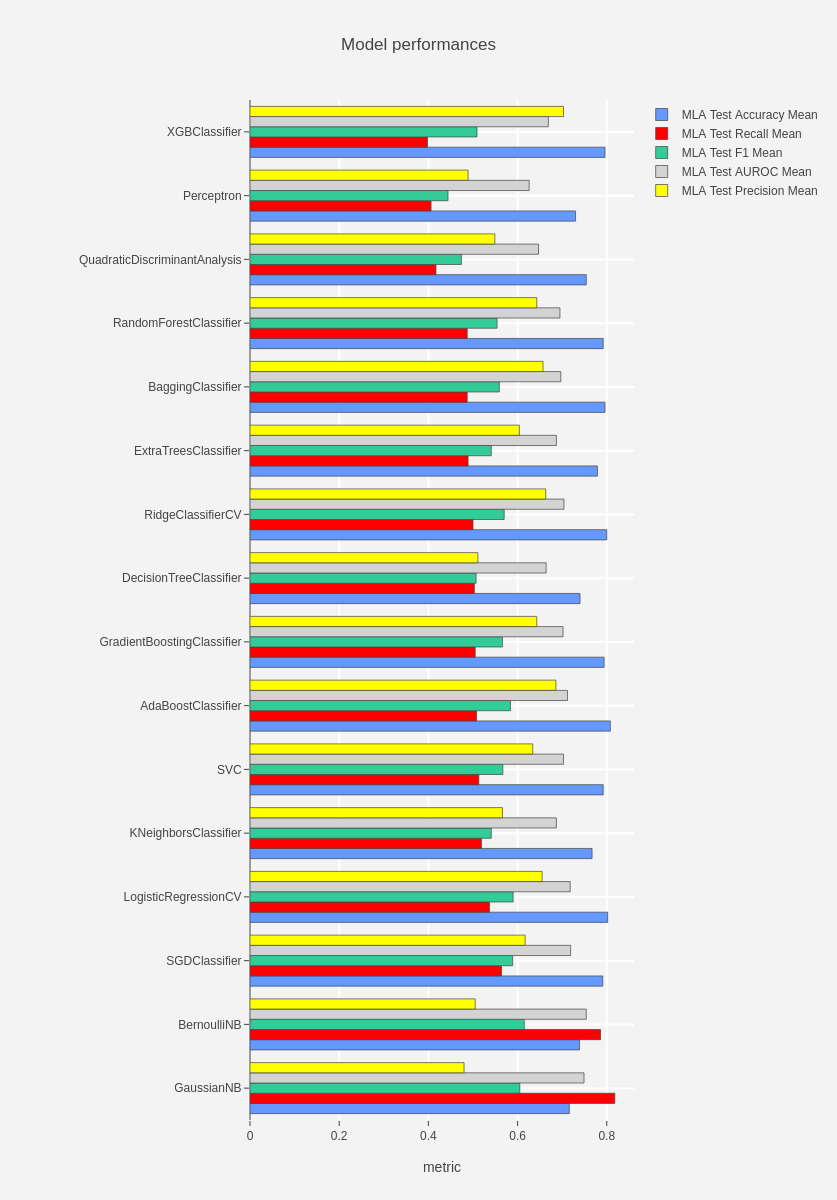

In [17]:
trace1  = model_comparison(MLA_compare_smote,"MLA Test Accuracy Mean","#6699FF")
trace2  = model_comparison(MLA_compare_smote,'MLA Test Recall Mean',"red")
trace3  = model_comparison(MLA_compare_smote,'MLA Test F1 Mean',"#33CC99")
trace4  = model_comparison(MLA_compare_smote,'MLA Test AUROC Mean',"lightgrey")
trace5  = model_comparison(MLA_compare_smote,'MLA Test Precision Mean',"yellow")
traces = [trace1,trace2,trace3,trace4,trace5]
fig = go.Figure(data=traces,layout=layout)
py.iplot(fig)

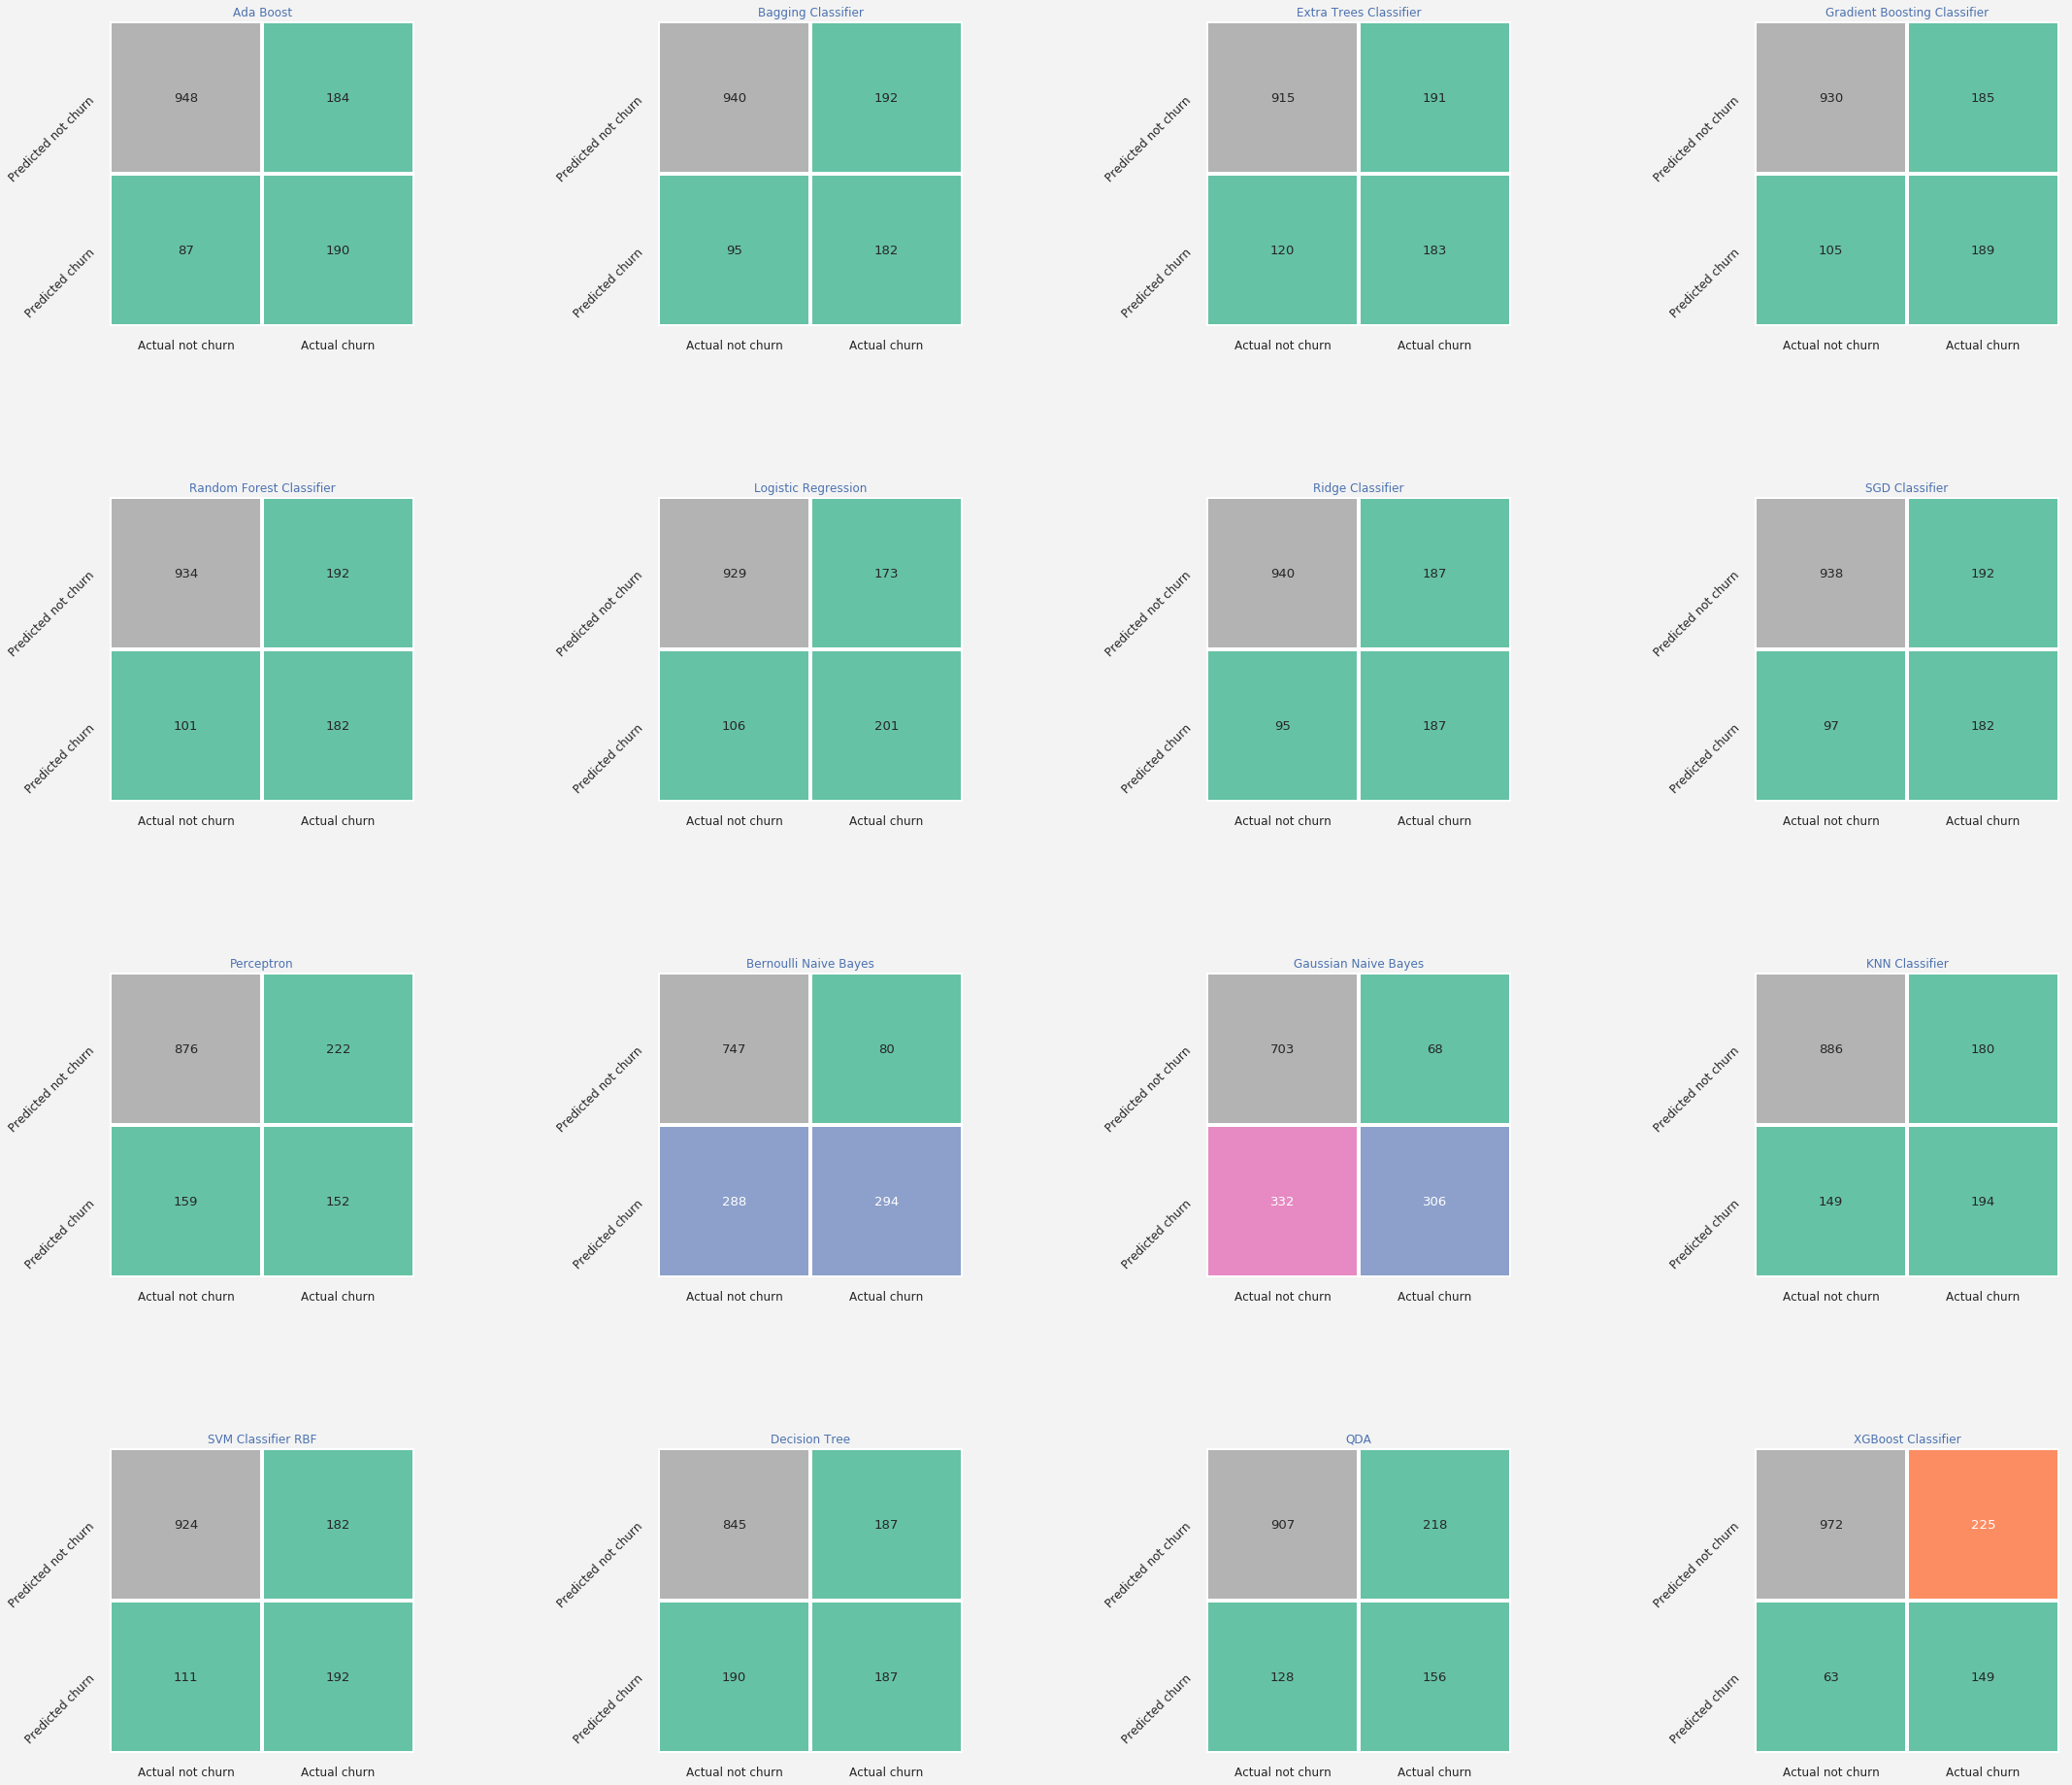

In [18]:
adaboost = ensemble.AdaBoostClassifier(learning_rate = 0.1, n_estimators= 100, random_state= 0).fit(smote_train_X,smote_train_Y)
bagging = ensemble.BaggingClassifier(max_samples= 0.5, n_estimators= 300, random_state= 0).fit(smote_train_X,smote_train_Y)
exttree = ensemble.ExtraTreesClassifier(criterion= 'gini', max_depth= 10, n_estimators= 10, random_state= 0).fit(smote_train_X,smote_train_Y)
gbc = ensemble.GradientBoostingClassifier(learning_rate= 0.05, max_depth= 4, n_estimators= 300, random_state= 0).fit(smote_train_X,smote_train_Y)
rfc = ensemble.RandomForestClassifier(criterion= 'gini', max_depth= 10, n_estimators= 300, oob_score= True, random_state= 0).fit(smote_train_X,smote_train_Y)
logit = linear_model.LogisticRegressionCV(fit_intercept= False, random_state= 0, solver= 'lbfgs').fit(smote_train_X,smote_train_Y)
ridge = linear_model.RidgeClassifierCV().fit(smote_train_X,smote_train_Y)
sgdc = linear_model.SGDClassifier().fit(smote_train_X,smote_train_Y)
perc = linear_model.Perceptron().fit(smote_train_X,smote_train_Y)
bnb = naive_bayes.BernoulliNB(alpha= 0.75).fit(smote_train_X,smote_train_Y)
gnb = naive_bayes.GaussianNB().fit(x_train,y_train).fit(smote_train_X,smote_train_Y)
knn = neighbors.KNeighborsClassifier(algorithm= 'brute', weights= 'uniform').fit(smote_train_X,smote_train_Y)
svc_rbf = svm.SVC(C= 5, decision_function_shape= 'ovo', gamma= 0.1, probability= True, random_state= 0).fit(smote_train_X,smote_train_Y)
dtc = tree.DecisionTreeClassifier().fit(smote_train_X,smote_train_Y)
qda = discriminant_analysis.QuadraticDiscriminantAnalysis().fit(smote_train_X,smote_train_Y)
xgc = XGBClassifier(learning_rate= 0.001, seed= 0).fit(smote_train_X,smote_train_Y)

lst    = [adaboost,bagging,exttree,gbc,rfc,logit,ridge,sgdc,perc,bnb,gnb,knn,svc_rbf,dtc,qda,xgc]

length = len(lst)

mods   = ['Ada Boost','Bagging Classifier','Extra Trees Classifier','Gradient Boosting Classifier',
          'Random Forest Classifier','Logistic Regression','Ridge Classifier','SGD Classifier',
          'Perceptron','Bernoulli Naive Bayes','Gaussian Naive Bayes', 'KNN Classifier','SVM Classifier RBF',
          'Decision Tree','QDA','XGBoost Classifier']

fig = plt.figure(figsize=(36,36))
fig.set_facecolor("#F3F3F3")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(4,4,j+1)
    predictions = i.predict(x_test)
    conf_matrix = confusion_matrix(predictions,y_test)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["Actual not churn","Actual churn"],
                yticklabels=["Predicted not churn","Predicted churn"],
                linewidths = 3,linecolor = "w",cmap = "Set2",cbar=False)

    plt.title(k,color = "b",fontsize=12)
    sns.set(font_scale=1.1)
    #plt.tight_layout()
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12,rotation=45)
    plt.subplots_adjust(wspace = .8,hspace = .005)


**6. Hypertuning Parameters**

Based on the above, I would choose Bernoulli NB method due to the highest. Let's now hypertune its parameters.

In [19]:
param_grid = dict(alpha = (0.001,0.01,0.05,0.1,0.5,1))
optim_Berno_NB = GridSearchCV(naive_bayes.BernoulliNB(),param_grid = param_grid, scoring = 'f1_macro')


In [20]:
def alg_report(algorithm,training_x,testing_x,
                                 training_y,testing_y,threshold_plot = True) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy Score   : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc)
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
     
    #plot roc curve
    trace1 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2),
                       )
    trace2 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot confusion matrix
    trace3 = go.Heatmap(z = conf_matrix ,x = ["Predict Not churn", "Predict Churn"],
                        y = ["Actual Not churn","Actual Churn"],
                        showscale  = False,colorscale = "Blues",name = "matrix",
                        xaxis = "x2",yaxis = "y2"
                       )
    
    layout = go.Layout(dict(title="Model performance" ,
                            autosize = False,height = 500,width = 800,
                            showlegend = False,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(title = "false positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         domain=[0, 0.6],
                                         ticklen=5,gridwidth=2),
                            yaxis = dict(title = "true positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         zerolinewidth=1,
                                         ticklen=5,gridwidth=2),
                            margin = dict(b=200),
                            xaxis2=dict(domain=[0.7, 1],tickangle = 90,
                                        gridcolor = 'rgb(255, 255, 255)'),
                            yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                           )
                  )
    data = [trace1,trace2,trace3]
    fig = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()

GridSearchCV(cv=None, error_score='raise',
       estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': (0.001, 0.01, 0.05, 0.1, 0.5, 1)},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1_macro', verbose=0)

 Classification report : 
              precision    recall  f1-score   support

          0       0.90      0.72      0.80      1035
          1       0.51      0.79      0.62       374

avg / total       0.80      0.74      0.75      1409

Accuracy Score   :  0.7388218594748048
Area under curve :  0.7539176935596374


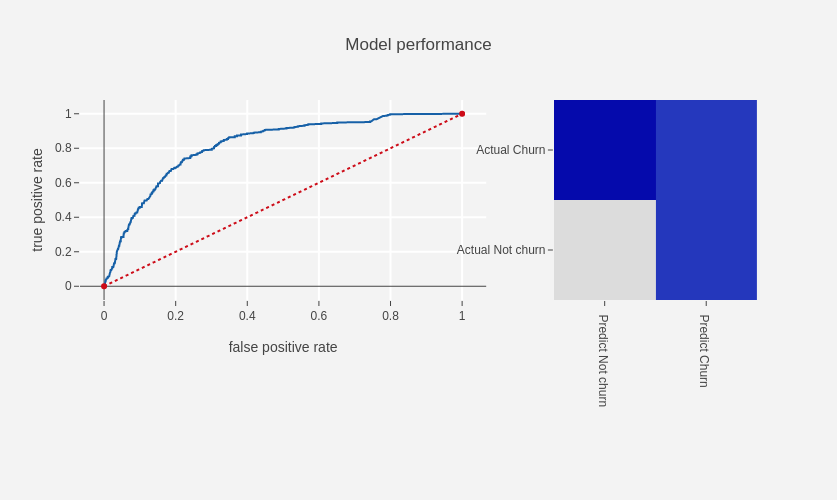

In [21]:
cols    = [i for i in data.columns if i not in Target]
alg_report(optim_Berno_NB,x_train.values,x_test.values,y_train["Churn"].values,y_test.values,cols)

**7. Conclusion**

Bernoulli Naive Bayes Model is selected as our final model to predict customer churn due to the F1-score, which balances precision and recall. 